In [1]:
# Import the usual libraries
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import os

plt.style.use('MSUstyle')

# Import sarkas
from sarkas.processes import PreProcess, Simulation, PostProcess
from sarkas.tools.observables import RadialDistributionFunction, Thermodynamics, VelocityAutoCorrelationFunction



=========================== Thermodynamics ===========================
Data saved in: 
 SarkasSimulations/test/PostProcessing/Thermodynamics/Equilibration/Thermodynamics_test.h5
Data accessible via: self.dataframe_slices, self.dataframe

Time Series Data:
No. of blocks = 1
No. dumps per block = 102
Total time per block: T = 6.7834e-13 [s] ~ 20 plasma periods
Time interval: dt = 6.7162e-15 [s] ~ 2.0e-01 plasma period



Thermodynamics calculation Time: 0 sec 45 msec 93 usec 750 nsec


/Users/silves28/Documents/Codes/sarkas/sarkas/tools/observables.py:4439: RuntimeWarning: divide by zero encountered in scalar divide
  self.beta_slices[isl] = 1.0 / (self.kB * self.dataframe_slices[("Temperature", f"slice {isl}")].mean())
/Users/silves28/Documents/Codes/sarkas/sarkas/tools/observables.py:4452: RuntimeWarning: invalid value encountered in scalar multiply
  denom = 1 - 2.0 * self.beta_slices[isl] ** 2 * kin_2 / (self.dimensions * self.total_num_ptcls)
/Users/silves28/anaconda3/envs/sarkas/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1983: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/silves28/Documents/Codes/sarkas/sarkas/tools/observables.py:5000: RuntimeWarning: divide by zero encountered in scalar divide
  t_ratio = self.T_desired / self.simulation_dataframe["Temperature"].mean()
/Users/silves28/Documents/Codes/sarkas/sarkas/tools/observables.py:5002: RuntimeWarning: invalid value encounter

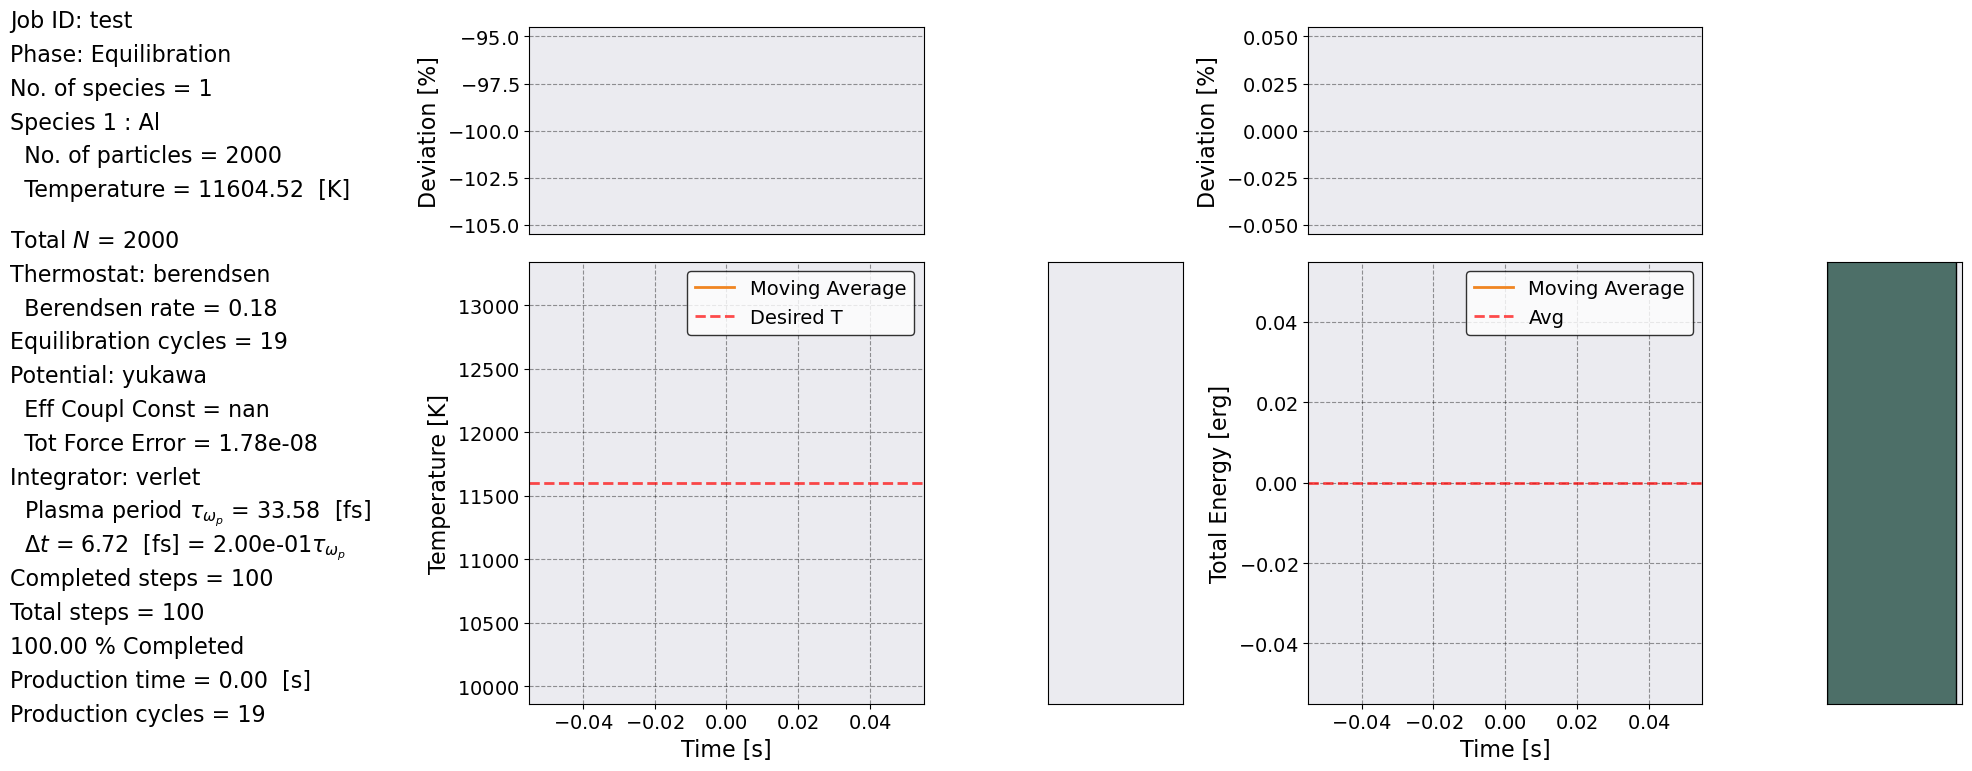

In [21]:
# Create the file path to the YAML input file
input_file_name = os.path.join('input_files', 'yocp_run.yaml')

# Initialize the Postprocessing class
postproc = PostProcess(input_file_name)
# Read the simulation's parameters and assign attributes
postproc.setup(read_yaml=True)

therm = Thermodynamics()
phase = 'equilibration'
therm.setup(postproc.parameters, phase = phase)
therm.compute()
therm.temp_energy_plot(postproc, phase = phase)

In [22]:
therm.simulation_dataframe

,Time,Total Energy,Kinetic Energy,Potential Energy,Temperature
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
96,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0
99,0.0,0.0,0.0,0.0,0.0


/var/folders/cq/63hr2pgs2m1_z45dj0_n28wm0000gp/T/ipykernel_3424/1617425492.py:22: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set(yscale = 'log')


[None]

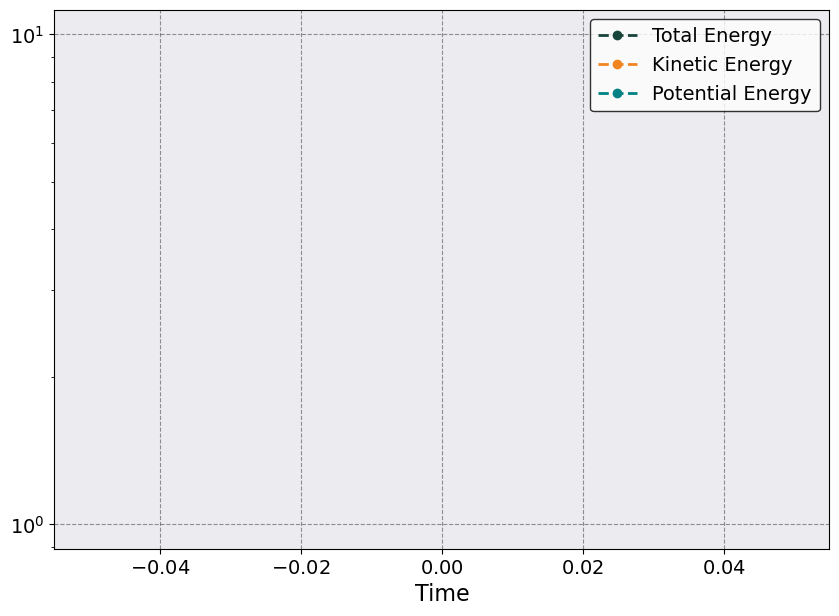

In [23]:
ax = therm.simulation_dataframe.plot(
    x = 'Time',
    y = 'Total Energy',
    ls = '--',
    marker = 'o'
)
therm.simulation_dataframe.plot(
    x = 'Time',
    y = 'Kinetic Energy',
    ls = '--',
    marker = 'o',
    ax = ax
)
therm.simulation_dataframe.plot(
    x = 'Time',
    y = 'Potential Energy',
    ls = '--',
    marker = 'o',
    ax = ax
)
# ax.axhline(therm.T_desired, ls = '--', c = 'r', )
ax.set(yscale = 'log')

In [19]:
import h5py

h5md_filepath = therm.h5md_filepath

total_thermodynamics_data = { key : np.zeros(therm.no_dumps) for key in therm.thermodynamics_list }
time_data = np.zeros(therm.no_dumps)


with h5py.File(h5md_filepath, 'r') as file:
    observables_group = file['observables']
    for sp_name in therm.species_names:
        species_group = observables_group[sp_name]
        
        for obs_name in therm.thermodynamics_list:
            obs_data = species_group[obs_name]
            display(obs_data["value"][10])
            # Assuming 'value' dataset exists and is indexed by step
            const = 1.0 if obs_name == 'temperature' else species_group.attrs['particle_number']/therm.total_num_ptcls
            total_thermodynamics_data[obs_name] += obs_data['value'][:] * const
            
            if obs_name == 'temperature': 
                time_data = obs_data['time'][:]


0.0

0.0

0.0

0.0

In [24]:
h5md_filepath

'SarkasSimulations/test/Simulation/Equilibration/dumps/test_data.h5md'